In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/customer/customercon_data1_7.xlsx')
data.head()

,TopFiveSalesAmount,GrossRevenue,TopCustomerToTotalRatio,CustomerConcentration,CustomerConcentrationHHI,SupplyChainConcentration
0,1.900515e+09,1.030000e+11,1.030,1.85,0.012397,0.93
1,2.823094e+09,1.350000e+11,0.880,2.09,0.012699,1.05
2,1.210000e+09,1.460000e+11,9.675,0.83,1.876500,1.92
3,2.697000e+09,1.960000e+11,9.675,2.98,1.876500,1.99
4,2.140000e+09,2.400000e+11,9.675,0.90,1.876500,1.49


In [ ]:
X = data.drop(['CustomerConcentration'], axis=1)
y = data['CustomerConcentration']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


       TopFiveSalesAmount  GrossRevenue  TopCustomerToTotalRatio  \
0            1.900515e+09  1.030000e+11                    1.030   
1            2.823094e+09  1.350000e+11                    0.880   
2            1.210000e+09  1.460000e+11                    9.675   
3            2.697000e+09  1.960000e+11                    9.675   
4            2.140000e+09  2.400000e+11                    9.675   
...                   ...           ...                      ...   
27252        5.207224e+07  5.207224e+07                   91.960   
27253        9.811000e+07  9.811317e+07                    9.675   
27254        1.061100e+08  1.061131e+08                    9.675   
27255        1.050200e+08  1.050223e+08                    9.675   
27256        9.941000e+07  9.940559e+07                    9.675   

       CustomerConcentrationHHI  SupplyChainConcentration  
0                      0.012397                      0.93  
1                      0.012699                      1.05  
2  

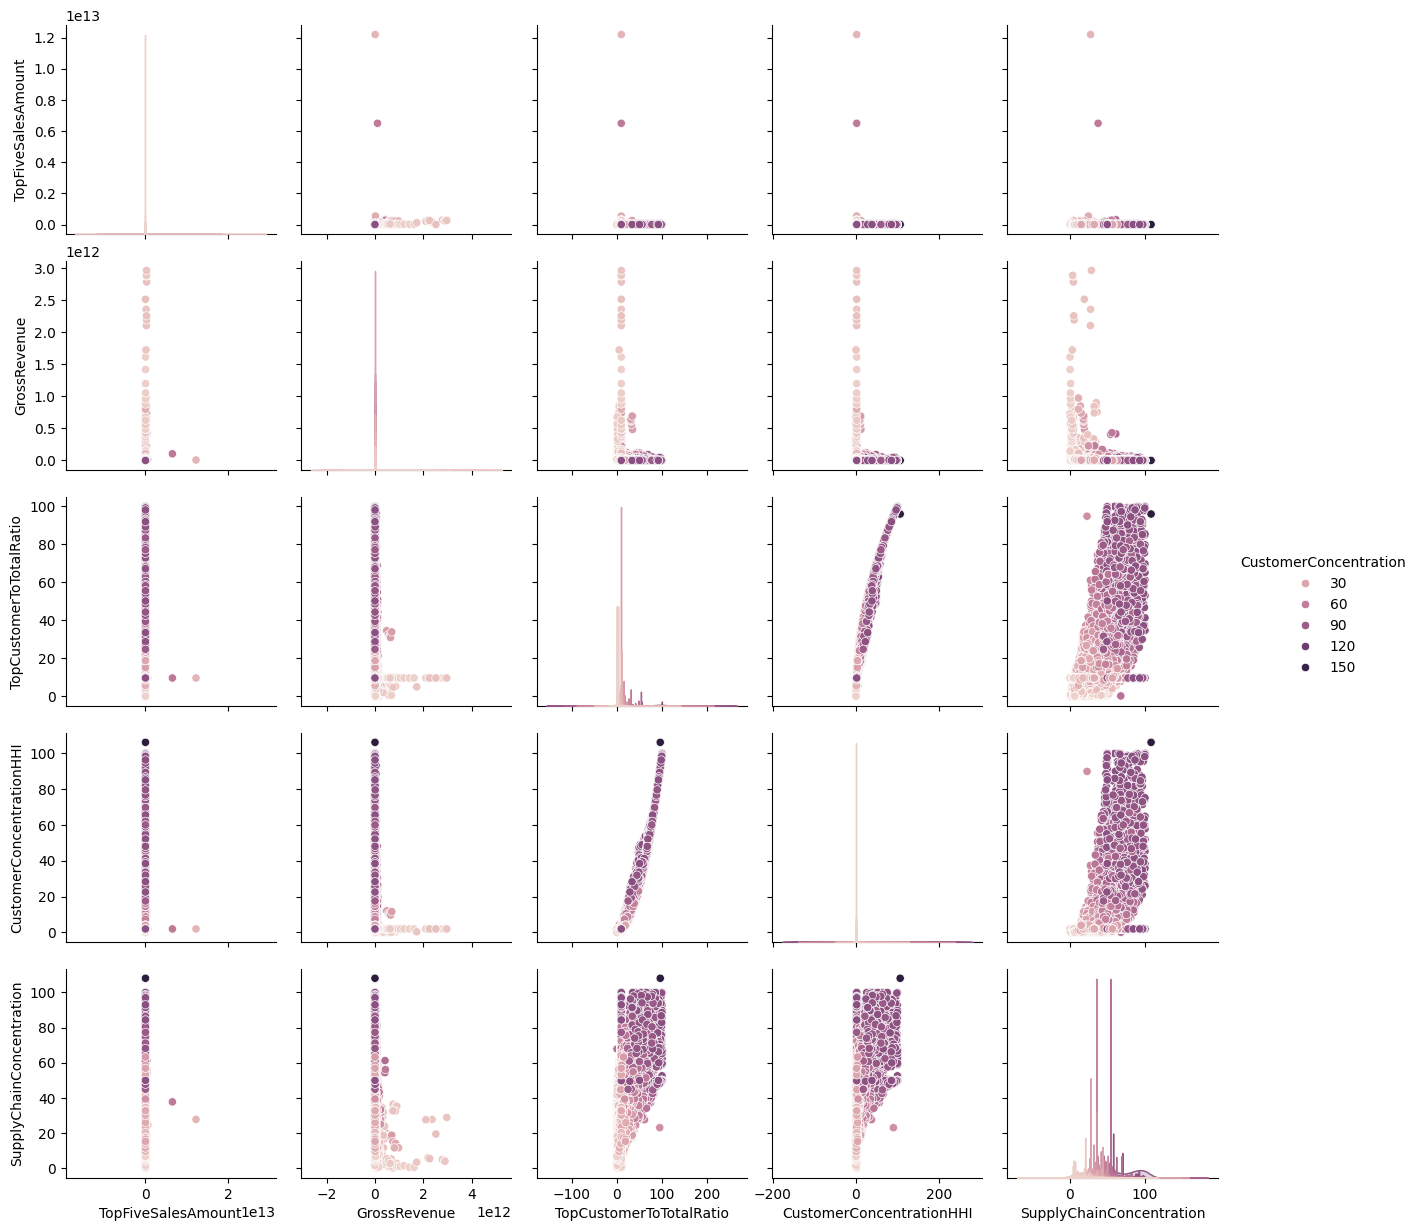

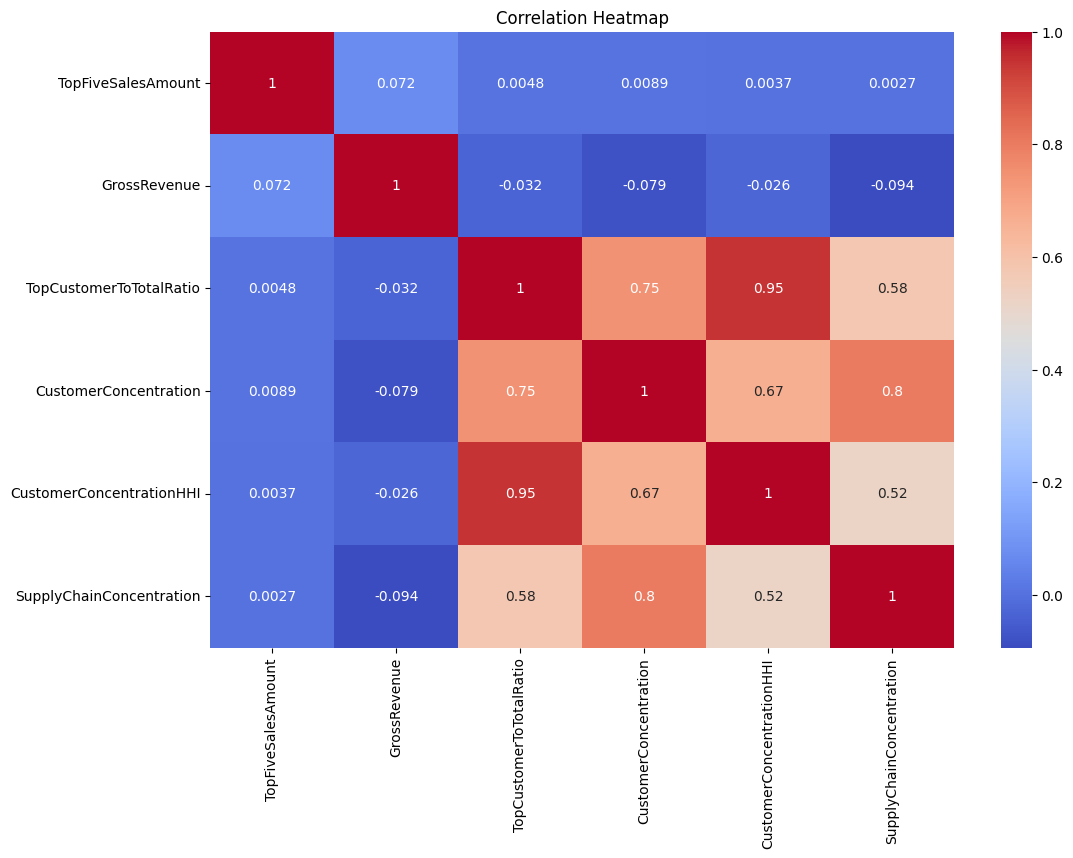

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family to a font available on your system
plt.rcParams['font.family'] = 'sans-serif'

# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='CustomerConcentration')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


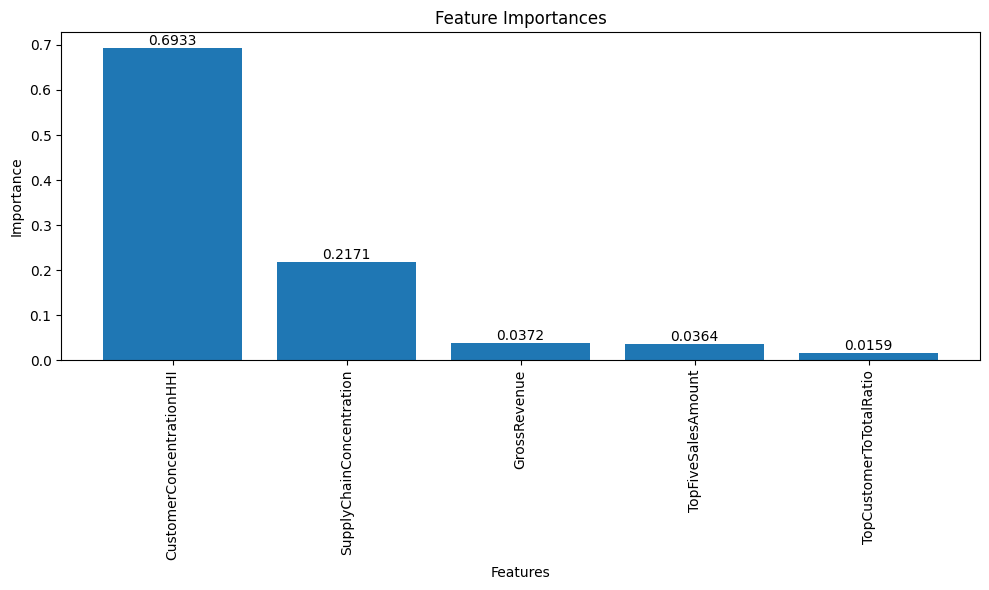

In [ ]:

model = RandomForestRegressor()
model.fit(X_train, y_train)


# Importance for Select the desired features by column
# Select the desired features
selected_features = [ 'TopFiveSalesAmount', 'GrossRevenue', 'TopCustomerToTotalRatio', 'CustomerConcentrationHHI', 'SupplyChainConcentration']

# Extract feature importances for selected features
importances = model.feature_importances_
feature_names = X.columns

selected_importances = []
for feature in selected_features:
    if feature in feature_names:
        feature_index = np.where(feature_names == feature)[0][0]
        selected_importances.append(importances[feature_index])
    else:
        selected_importances.append(0)  # Assign 0 importance if feature not found

# Create a DataFrame with selected feature names and importance scores
selected_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})

# Sort the DataFrame by importance scores in descending order
selected_feature_importances = selected_feature_importances.sort_values('Importance', ascending=False)


# Plot the feature importances with values displayed inside the bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()



Cross-Validation RMSE Scores: [3.68292792 3.88773564 4.04361185 3.77160008 3.79244266]
Mean Cross-Validation RMSE: 3.835663632090244


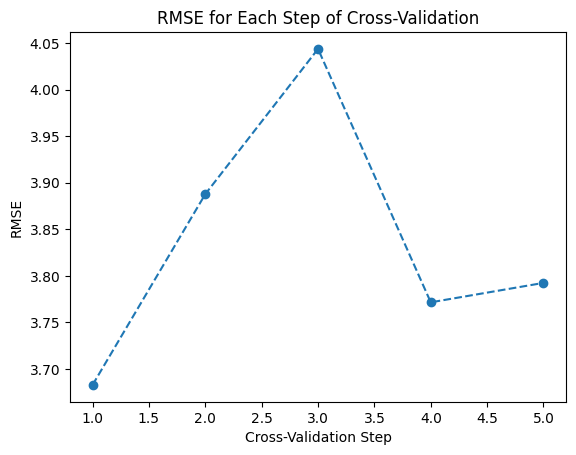

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [ ]:
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 16.0404186907832
Mean Absolute Error: 1.6997621606749815


In [ ]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 12.89487645589315
Validation Mean Absolute Error: 1.65495700527402


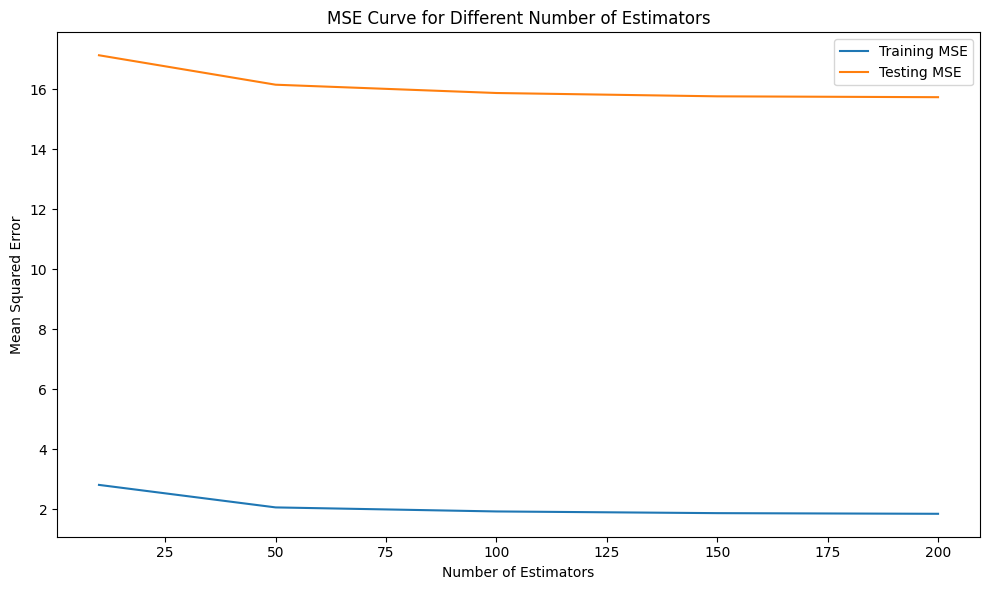

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []



for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


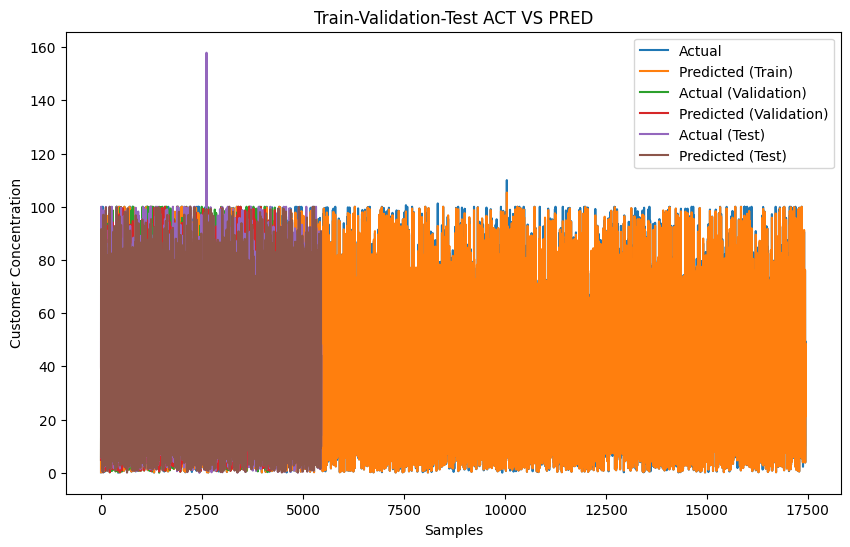

In [ ]:
# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


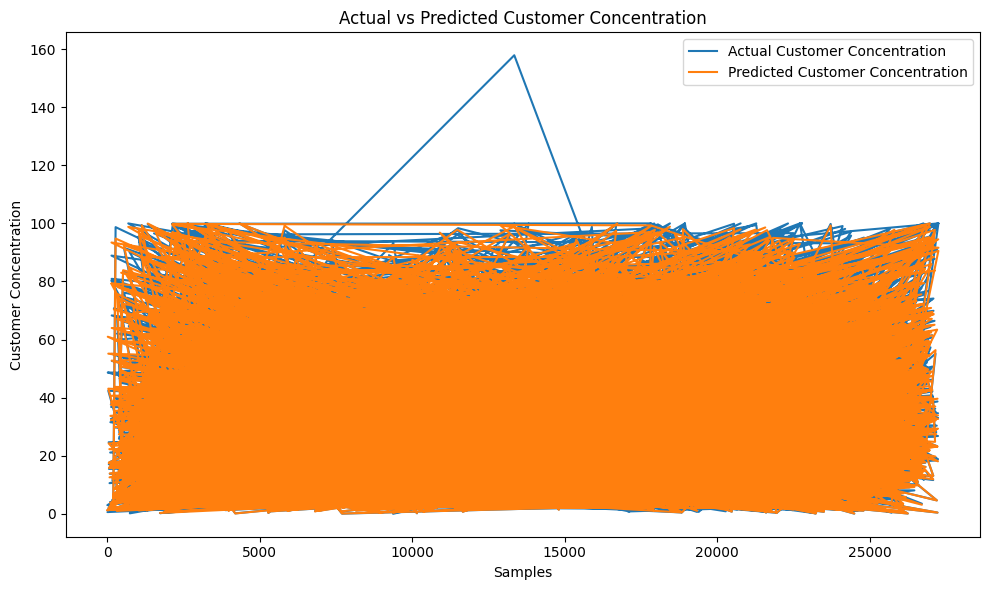

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


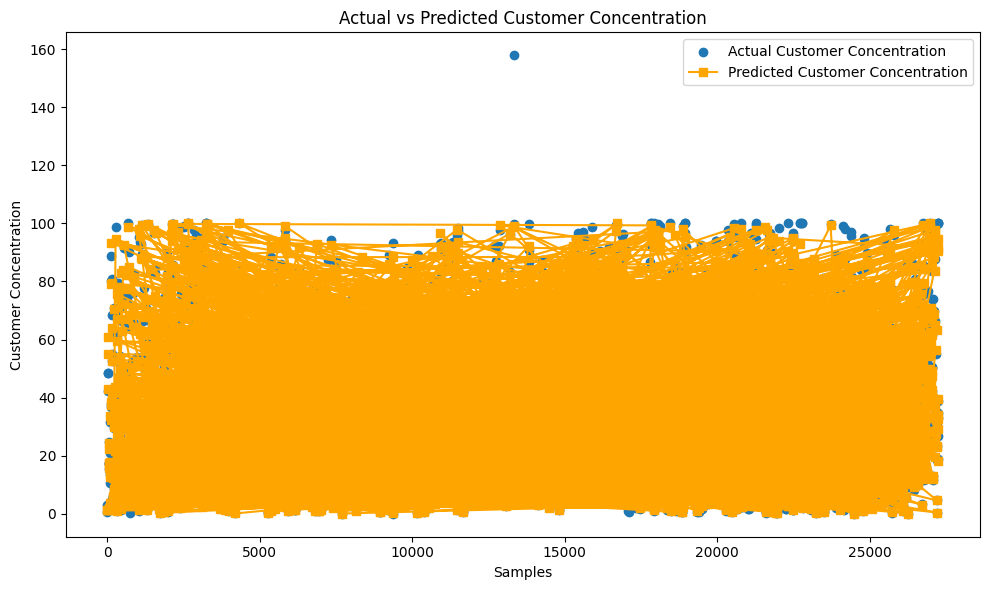

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 40  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

#print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 1.70
Mean Squared Error (MSE): 16.35
Root Mean Squared Error (RMSE): 4.04
R-squared (R2): 0.97
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 7.55%


**Proposed ACO based RFR**

Cross-Validation RMSE Scores: [3.69727527 3.83453925 4.08187211 3.84261689 3.79803791]
Mean Cross-Validation RMSE: 3.850868286562565


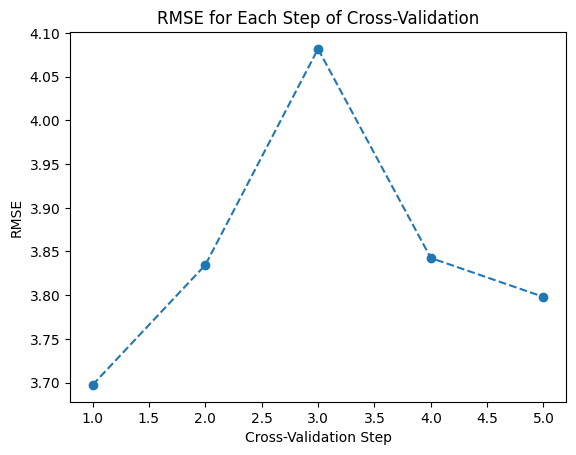

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define Ant Colony Optimization (ACO) class
class AntColonyOptimizer:
    def __init__(self, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None

    def initialize_pheromone(self, param_space):
        self.pheromone = [np.ones(len(param)) for param in param_space]

    def select_hyperparameters(self, param_space):
        selected_params = []
        for i in range(len(param_space)):
            probs = self.pheromone[i] / self.pheromone[i].sum()
            selected_param = np.random.choice(param_space[i], p=probs)
            selected_params.append(selected_param)
        return selected_params

    def optimize(self, param_space, X_train, y_train):
        self.initialize_pheromone(param_space)

        best_params = None
        best_score = -np.inf

        for _ in range(self.n_iterations):
            all_scores = []
            all_params = []

            for _ in range(self.n_ants):
                params = self.select_hyperparameters(param_space)
                model = RandomForestRegressor(
                    n_estimators=params[0],
                    max_depth=params[1],
                    min_samples_split=params[2],
                    random_state=42
                )
                score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
                all_scores.append(score)
                all_params.append(params)

                if score > best_score:
                    best_score = score
                    best_params = params

            # Pheromone update
            sorted_params = sorted(zip(all_scores, all_params), key=lambda x: x[0], reverse=True)
            for i in range(len(param_space)):
                self.pheromone[i] *= self.decay
                for _, params in sorted_params[:self.n_best]:
                    selected_index = param_space[i].index(params[i])
                    self.pheromone[i][selected_index] += 1

        return best_params

# Hyperparameter search space
param_space = [
    [50, 100, 150, 200],  # n_estimators
    [10, 20, 30, None],   # max_depth
    [2, 5, 10]            # min_samples_split
]

# Initialize and run ACO
aco = AntColonyOptimizer(n_ants=1, n_best=3, n_iterations=10, decay=0.95)
best_params = aco.optimize(param_space, X_train, y_train)

# Train the Random Forest with the best parameters
rf_regressor = RandomForestRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    random_state=42
)
rf_regressor.fit(X_train, y_train)

# Perform cross-validation and calculate RMSE scores
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


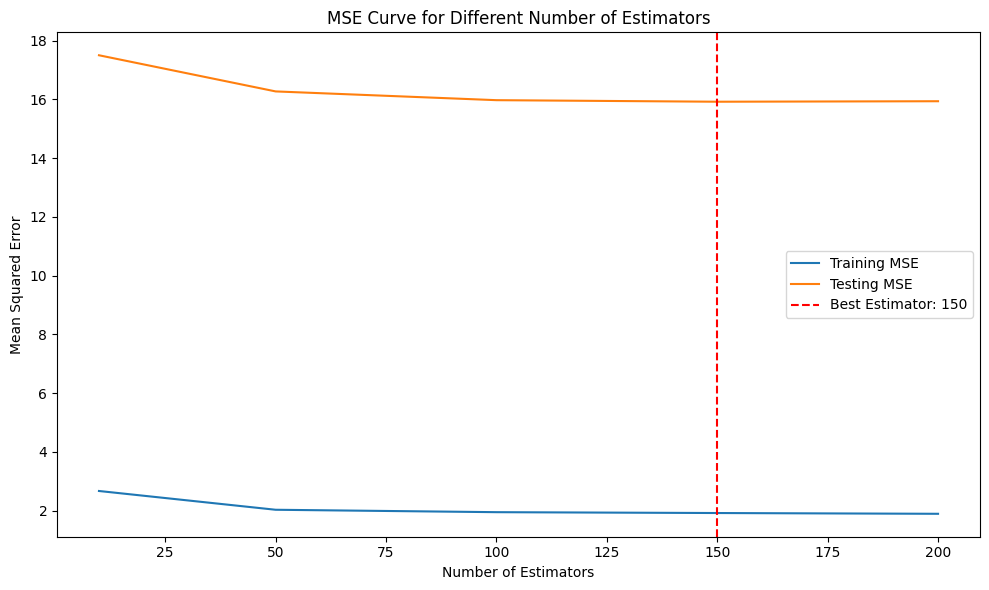

Best Number of Estimators: 150
Best Cross-Validation MSE: 14.789806846039138


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Define Ant Colony Optimization (ACO) class
class AntColonyOptimizer:
    def __init__(self, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None

    def initialize_pheromone(self, param_space):
        self.pheromone = [np.ones(len(param)) for param in param_space]

    def select_hyperparameters(self, param_space):
        selected_params = []
        for i in range(len(param_space)):
            probs = self.pheromone[i] / self.pheromone[i].sum()
            selected_param = np.random.choice(param_space[i], p=probs)
            selected_params.append(selected_param)
        return selected_params

    def optimize(self, param_space, X_train, y_train):
        self.initialize_pheromone(param_space)

        best_params = None
        best_score = np.inf  # We aim to minimize the error, hence start with infinity

        for _ in range(self.n_iterations):
            all_scores = []
            all_params = []

            for _ in range(self.n_ants):
                params = self.select_hyperparameters(param_space)
                model = RandomForestRegressor(n_estimators=params[0], random_state=42)
                score = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
                all_scores.append(score)
                all_params.append(params)

                if score < best_score:
                    best_score = score
                    best_params = params

            # Pheromone update
            sorted_params = sorted(zip(all_scores, all_params), key=lambda x: x[0])
            for i in range(len(param_space)):
                self.pheromone[i] *= self.decay
                for _, params in sorted_params[:self.n_best]:
                    selected_index = param_space[i].index(params[i])
                    self.pheromone[i][selected_index] += 1

        return best_params, best_score

# Define the search space for n_estimators
param_space = [
    [10, 50, 100, 150, 200]  # n_estimators
]

# Initialize and run ACO
aco = AntColonyOptimizer(n_ants=1, n_best=3, n_iterations=5, decay=0.95)
best_params, best_score = aco.optimize(param_space, X_train, y_train)

# Extract the best number of estimators
best_n_estimators = best_params[0]

# Initialize lists to store train and test errors
train_errors = []
test_errors = []

# Evaluate the model performance for different n_estimators values
for n in param_space[0]:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    # Predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(param_space[0], train_errors, label='Training MSE')
plt.plot(param_space[0], test_errors, label='Testing MSE')
plt.axvline(best_n_estimators, color='r', linestyle='--', label=f'Best Estimator: {best_n_estimators}')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best Number of Estimators: {best_n_estimators}")
print(f"Best Cross-Validation MSE: {best_score}")


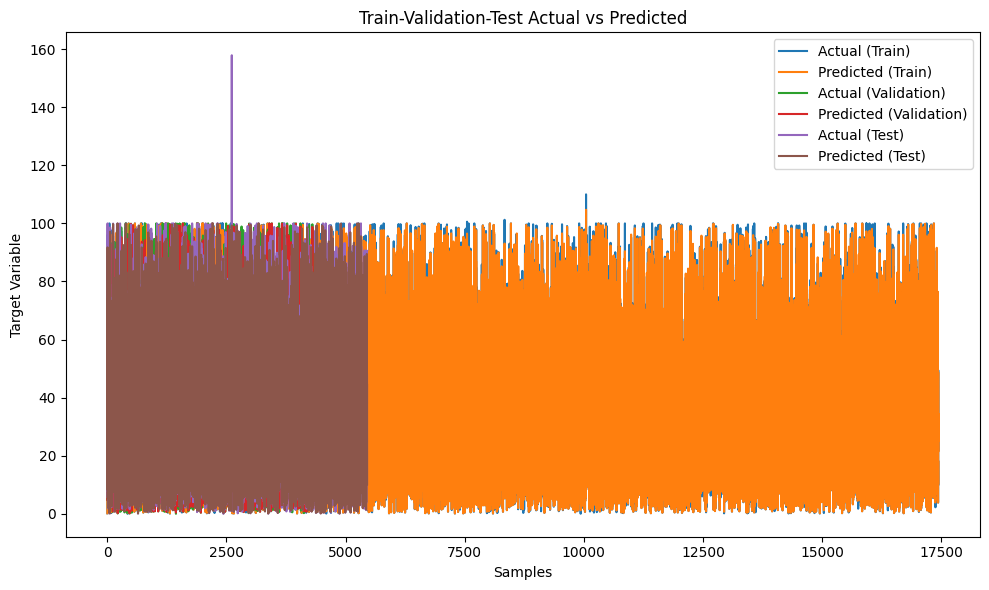

Training Set Mean Squared Error: 1.9190867273650298


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assume X_train, y_train, X_val, y_val, X_test, and y_test are already defined

# Use the best number of estimators found by ACO
best_n_estimators = best_params[0]

# Train the Random Forest Regressor using the best hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
rf_regressor.fit(X_train, y_train)

# Calculate predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_val = rf_regressor.predict(X_val)
y_pred_test = rf_regressor.predict(X_test)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()

# Print the training set MSE
print(f"Training Set Mean Squared Error: {mse_train}")


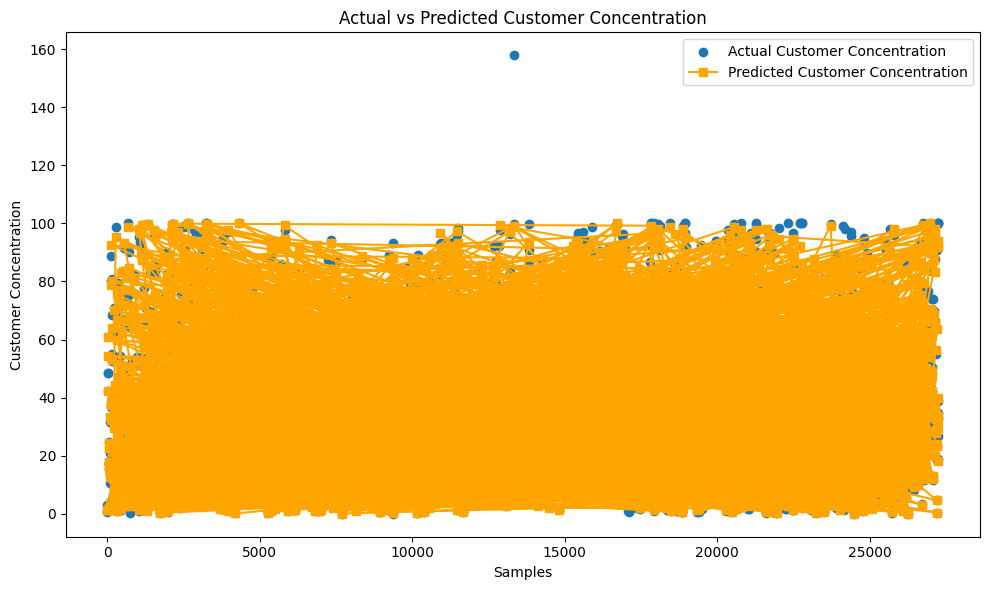

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Use the best hyperparameters found by ACO
best_n_estimators = best_params[0]

# Train the Random Forest Regressor using the best hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Create a DataFrame with actual and predicted Customer Concentration values
customer_concentration_comparison = pd.DataFrame({
    'Actual Customer Concentration': y_test,
    'Predicted Customer Concentration': y_pred
})

# Plot the actual versus predicted Customer Concentration values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(customer_concentration_comparison.index, customer_concentration_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(customer_concentration_comparison.index, customer_concentration_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Define Ant Colony Optimization (ACO) class
class AntColonyOptimizer:
    def __init__(self, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None

    def initialize_pheromone(self, param_space):
        # Initialize pheromone matrix as a 2D array, with each row corresponding to a parameter
        self.pheromone = [np.ones(len(param)) for param in param_space]

    def select_hyperparameters(self, param_space):
        selected_params = []
        for i in range(len(param_space)):
            probs = self.pheromone[i] / self.pheromone[i].sum()  # Normalize pheromones to create a probability distribution
            selected_param = np.random.choice(param_space[i], p=probs)
            selected_params.append(selected_param)
        return selected_params

    def optimize(self, param_space, X_train, y_train):
        self.initialize_pheromone(param_space)

        best_params = None
        best_score = -np.inf

        for _ in range(self.n_iterations):
            all_scores = []
            all_params = []

            for _ in range(self.n_ants):
                params = self.select_hyperparameters(param_space)
                model = RandomForestRegressor(
                    n_estimators=params[0],
                    max_depth=params[1],
                    min_samples_split=params[2],
                    random_state=42
                )
                score = cross_val_score(model, X_train, y_train, cv=3).mean()
                all_scores.append(score)
                all_params.append(params)

                if score > best_score:
                    best_score = score
                    best_params = params

            # Pheromone update
            sorted_params = sorted(zip(all_scores, all_params), key=lambda x: x[0], reverse=True)
            for i in range(len(param_space)):
                self.pheromone[i] *= self.decay  # Apply decay to pheromone values
                for _, params in sorted_params[:self.n_best]:
                    selected_index = param_space[i].index(params[i])
                    self.pheromone[i][selected_index] += 1  # Increase pheromone level for successful params

        return best_params

# Hyperparameter search space
param_space = [
    [50, 100, 150, 200],  # n_estimators
    [10, 20, 30, None],   # max_depth
    [2, 5, 10]            # min_samples_split
]

# Initialize and run ACO
aco = AntColonyOptimizer(n_ants=3, n_best=3, n_iterations=20, decay=0.95)
best_params = aco.optimize(param_space, X_train, y_train)

# Train the Random Forest with the best parameters
forest_model = RandomForestRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    random_state=42
)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with Optimized Estimators:")
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with Optimized Estimators:
Best Hyperparameters: [200, None, 2]
Mean Absolute Error (MAE): 1.68
Mean Squared Error (MSE): 15.93
Root Mean Squared Error (RMSE): 3.99
R-squared (R2): 0.97
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 7.56%


       Actual  Predicted
25520   40.11   39.82455
15090   75.58   74.03835
16497   31.49   31.40925
11682   14.91   14.90025
17281   26.26   25.66500
17931  100.00   91.80635
21539    7.83    8.16190
18804   45.58   43.77435
18013   12.25   13.59675
26186    5.62    5.61545


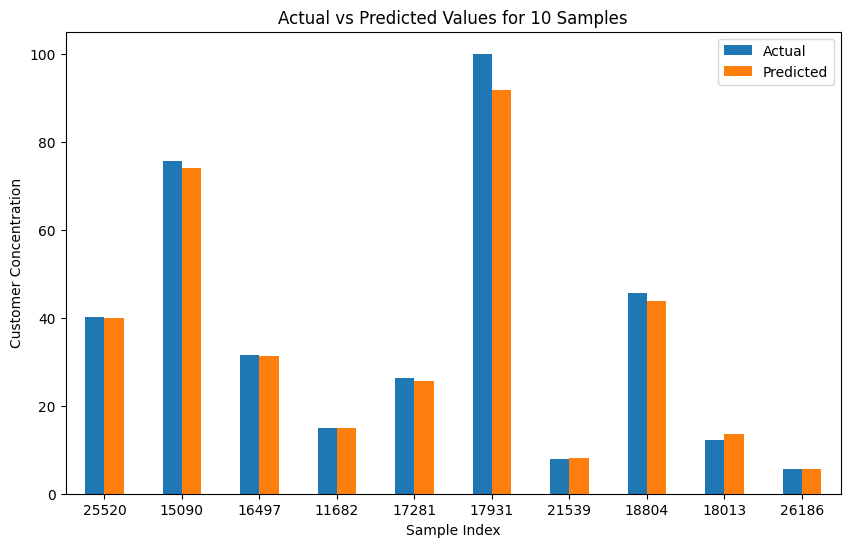

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming the model is already trained
# forest_model = RandomForestRegressor(...)

# Select or generate 10 samples for prediction
# For example, using the first 10 samples of X_test:
X_test_sample = X_test[:10]
y_test_sample = y_test[:10]  # Corresponding actual values

# Make predictions on these 10 samples
y_pred_sample = forest_model.predict(X_test_sample)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test_sample,
    'Predicted': y_pred_sample
})

# Display the DataFrame
print(comparison_df)

# If you want to visualize it:
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Actual vs Predicted Values for 10 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Customer Concentration')
plt.xticks(rotation=0)
plt.show()


       Actual  Predicted
25520   40.11   39.82455
15090   75.58   74.03835
16497   31.49   31.40925
11682   14.91   14.90025
17281   26.26   25.66500
17931  100.00   91.80635
21539    7.83    8.16190
18804   45.58   43.77435
18013   12.25   13.59675
26186    5.62    5.61545


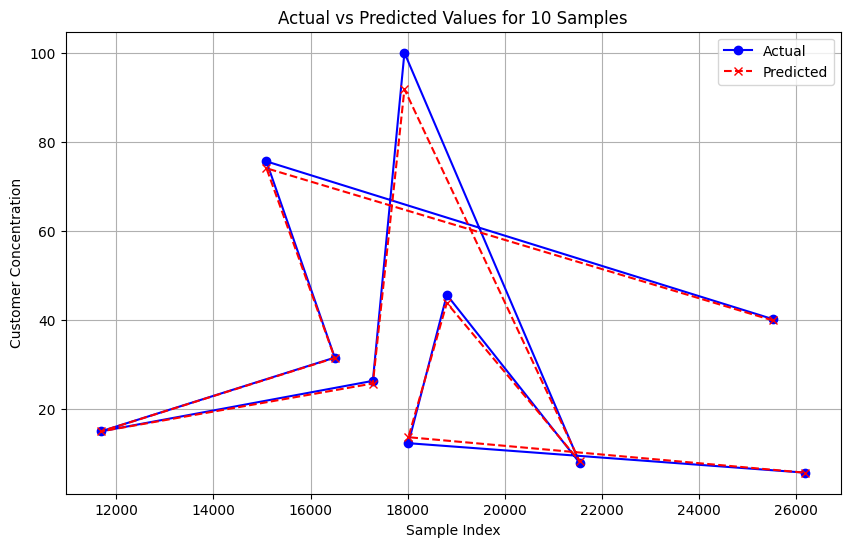

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the model is already trained
# forest_model = RandomForestRegressor(...)

# Select or generate 10 samples for prediction
# For example, using the first 10 samples of X_test:
X_test_sample = X_test[:10]
y_test_sample = y_test[:10]  # Corresponding actual values

# Make predictions on these 10 samples
y_pred_sample = forest_model.predict(X_test_sample)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test_sample,
    'Predicted': y_pred_sample
})

# Display the DataFrame
print(comparison_df)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))

# Plotting Actual values
plt.plot(comparison_df.index, comparison_df['Actual'], marker='o', linestyle='-', color='b', label='Actual')

# Plotting Predicted values
plt.plot(comparison_df.index, comparison_df['Predicted'], marker='x', linestyle='--', color='r', label='Predicted')

# Adding labels and title
plt.title('Actual vs Predicted Values for 10 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Customer Concentration')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.show()


       Actual  Predicted
25520   40.11   39.82455
15090   75.58   74.03835
16497   31.49   31.40925
11682   14.91   14.90025
17281   26.26   25.66500
17931  100.00   91.80635
21539    7.83    8.16190
18804   45.58   43.77435
18013   12.25   13.59675
26186    5.62    5.61545


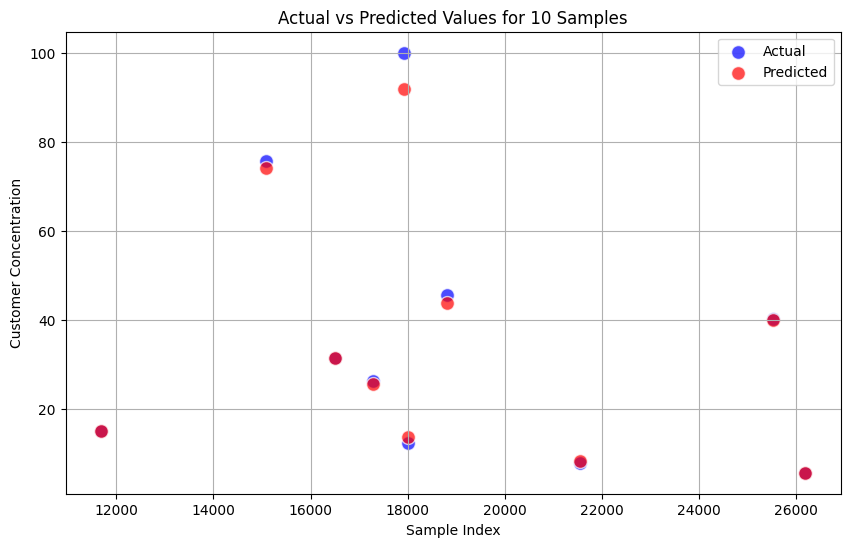

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the model is already trained
# forest_model = RandomForestRegressor(...)

# Select or generate 10 samples for prediction
# For example, using the first 10 samples of X_test:
X_test_sample = X_test[:10]
y_test_sample = y_test[:10]  # Corresponding actual values

# Make predictions on these 10 samples
y_pred_sample = forest_model.predict(X_test_sample)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test_sample,
    'Predicted': y_pred_sample
})

# Display the DataFrame
print(comparison_df)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))

# Plotting Actual values
plt.scatter(comparison_df.index, comparison_df['Actual'], color='b', label='Actual', s=100, edgecolor='w', alpha=0.7)

# Plotting Predicted values
plt.scatter(comparison_df.index, comparison_df['Predicted'], color='r', label='Predicted', s=100, edgecolor='w', alpha=0.7)

# Adding labels and title
plt.title('Actual vs Predicted Values for 10 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Customer Concentration')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.show()


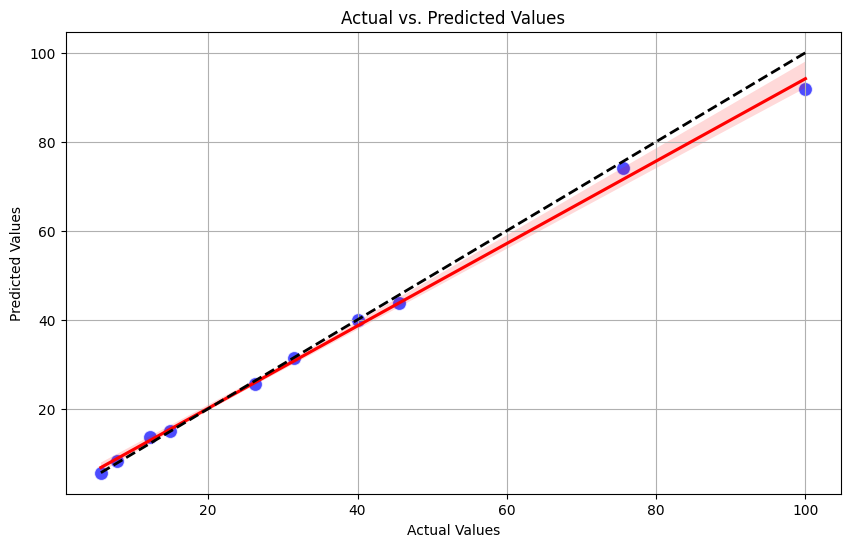

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from the data
data = {
    'Actual': [40.11, 75.58, 31.49, 14.91, 26.26, 100.00, 7.83, 45.58, 12.25, 5.62],
    'Predicted': [39.82455, 74.03835, 31.40925, 14.90025, 25.66500, 91.80635, 8.16190, 43.77435, 13.59675, 5.61545]
}
df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df, color='blue', s=100, edgecolor='w', alpha=0.7)

# Add a regression line
sns.regplot(x='Actual', y='Predicted', data=df, scatter=False, color='red')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a diagonal line for reference
plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], 'k--', lw=2)

# Show the plot
plt.grid(True)
plt.show()


Cross-Validation RMSE Scores: [5.35388574 5.57196178 5.74203971 6.50635015 6.48240399]
Mean Cross-Validation RMSE: 5.931328271656125


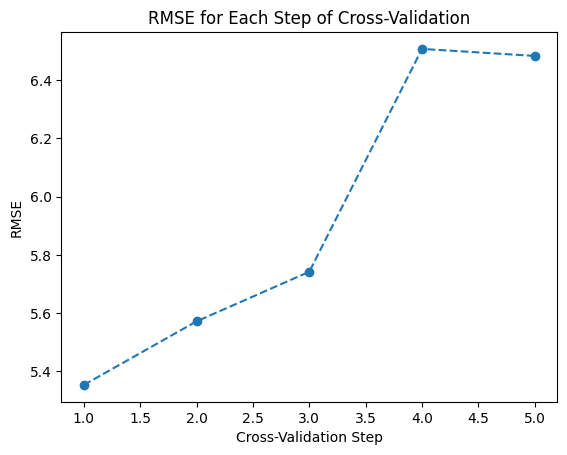

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 31.611625865003667
Mean Absolute Error: 1.7329933969185618


In [ ]:
# Predict on the validation set
y_pred_val = knn_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 35.23940589039211
Validation Mean Absolute Error: 1.8486998394863563


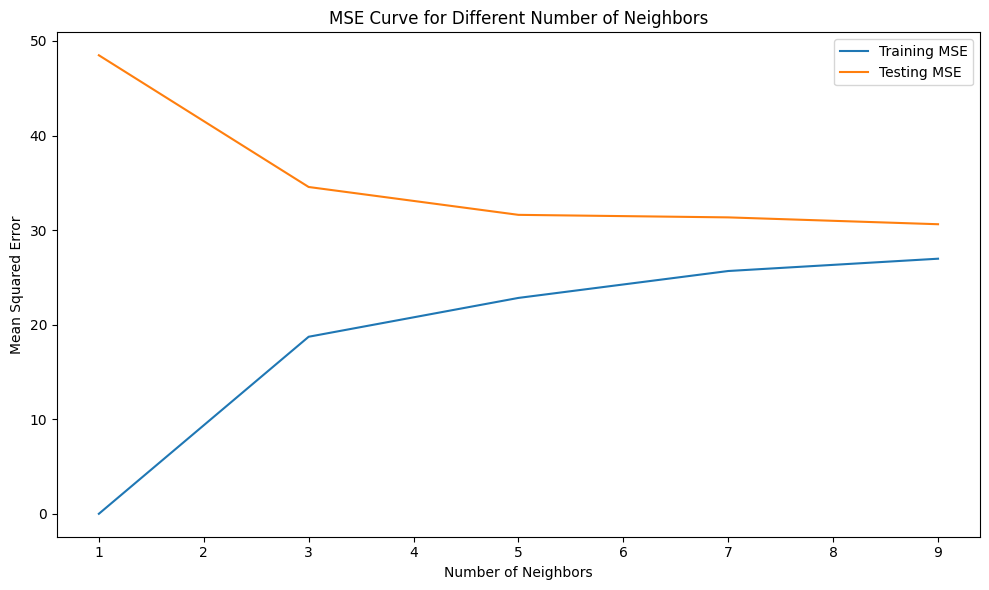

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

num_neighbors = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for k in num_neighbors:
    # Train the KNN regression model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_neighbors, train_errors, label='Training MSE')
plt.plot(num_neighbors, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


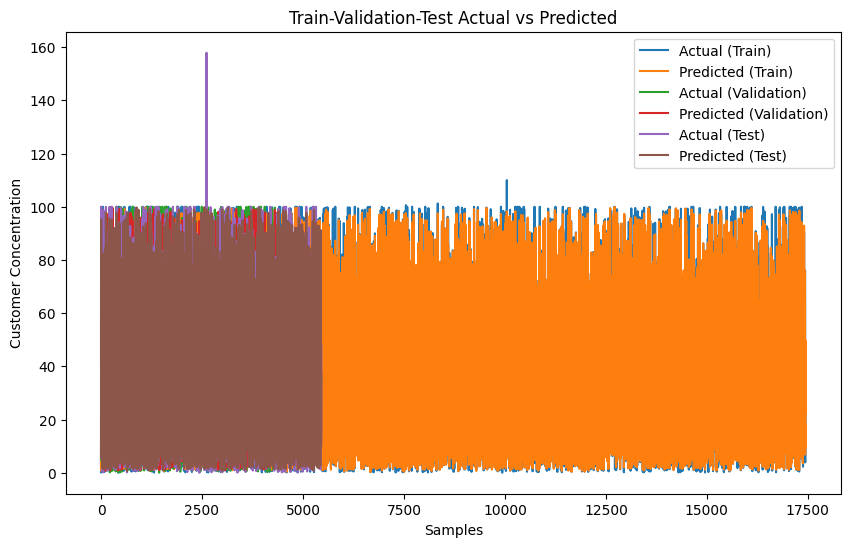

In [ ]:
# Calculate the training set predictions
y_pred_train = knn_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = knn_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = knn_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


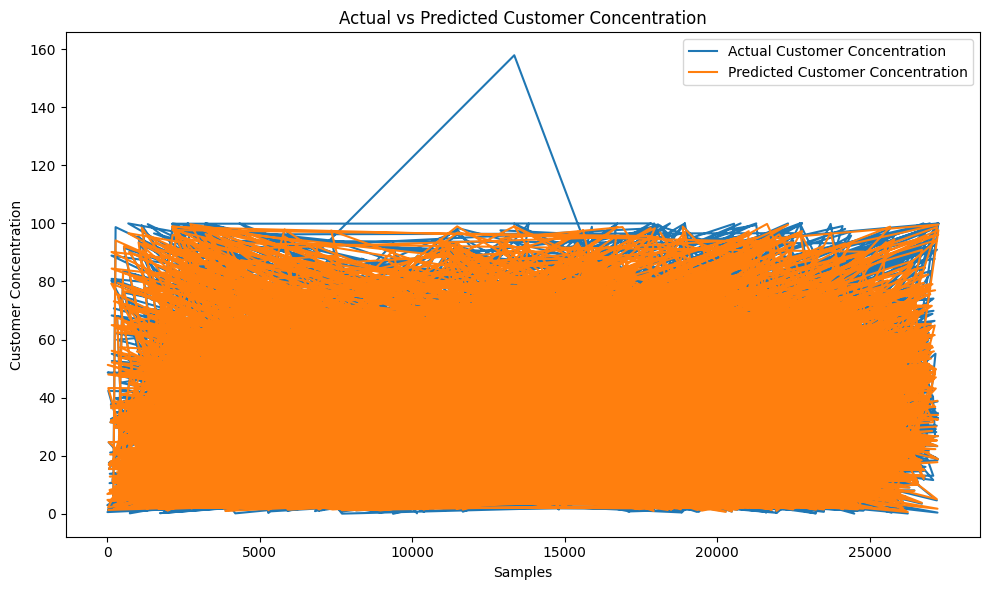

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


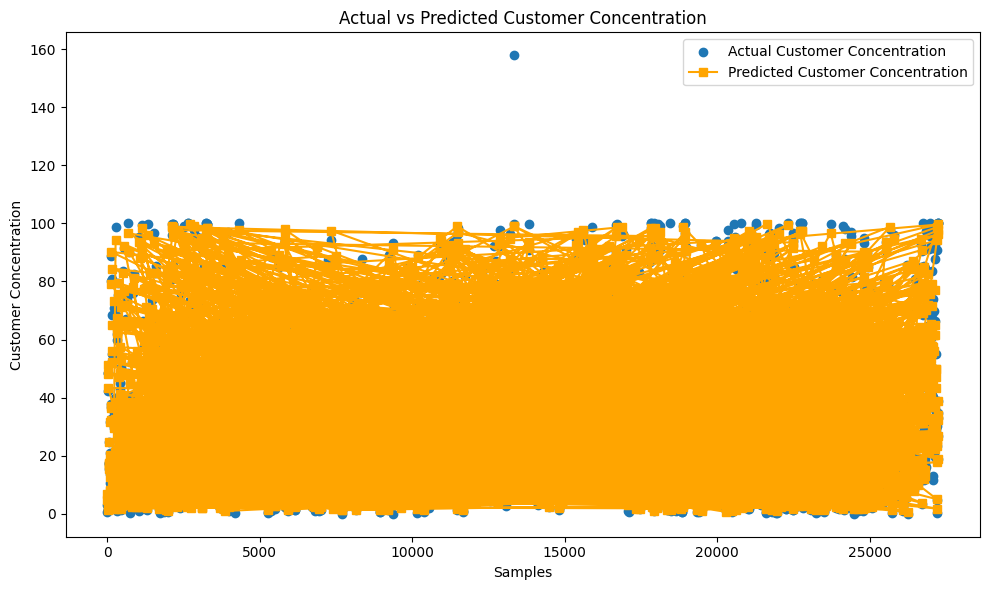

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 1.73
Mean Squared Error (MSE): 31.61
Root Mean Squared Error (RMSE): 5.62
R-squared (R2): 0.94
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 25.84%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Set hyperparameter values
n_neighbors = 7  # Number of neighbors to consider (you can adjust this)
weights = 'distance'  # Weight points by the inverse of their distance
algorithm = 'auto'  # Algorithm to compute the nearest neighbors
leaf_size = 30  # Leaf size for the BallTree or KDTree
p = 2  # Power parameter for the Minkowski metric (2 for Euclidean distance)

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(
    n_neighbors=n_neighbors,
    weights=weights,
    algorithm=algorithm,
    leaf_size=leaf_size,
    p=p
)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 1.61
Mean Squared Error (MSE): 29.97
Root Mean Squared Error (RMSE): 5.47
R-squared (R2): 0.94
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 22.33%


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 5
[LightGBM] [Info] Start training from score 32.520210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 13955, number of used features: 5
[LightGBM] [Info] Start training from score 32.589183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 13955, number of used features: 5
[LightGBM] [Info] Start trai

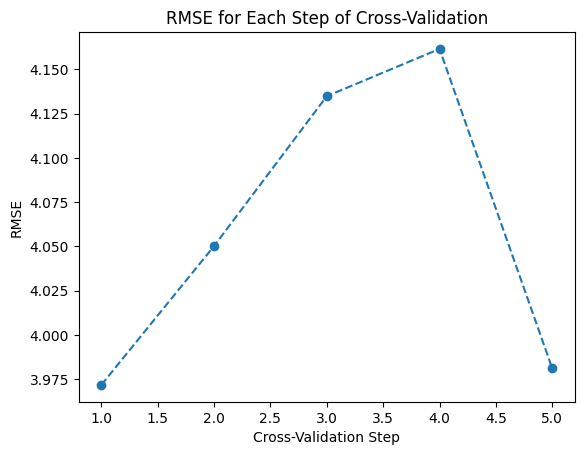

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train defined

lgbm_regressor = LGBMRegressor()  # Initialize LGBMRegressor
lgbm_regressor.fit(X_train, y_train)  # Fit the model

cv_scores = cross_val_score(lgbm_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have X_train, X_test, y_train, and y_test defined

lgbm_regressor = LGBMRegressor()  # Initialize LGBMRegressor
lgbm_regressor.fit(X_train, y_train)  # Fit the model

# Predict on the test set
y_pred_test = lgbm_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 5
[LightGBM] [Info] Start training from score 32.520210
Mean Squared Error: 19.090692042049238
Mean Absolute Error: 2.3032205197501154


In [ ]:
# Predict on the validation set
y_pred_val = lgbm_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 17.178209772419677
Validation Mean Absolute Error: 2.3459955216400727


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 5
[LightGBM] [Info] Start training from score 32.520210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 5
[LightGBM] [Info] Start training from score 32.520210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 5
[LightGBM] [Info] Start trai

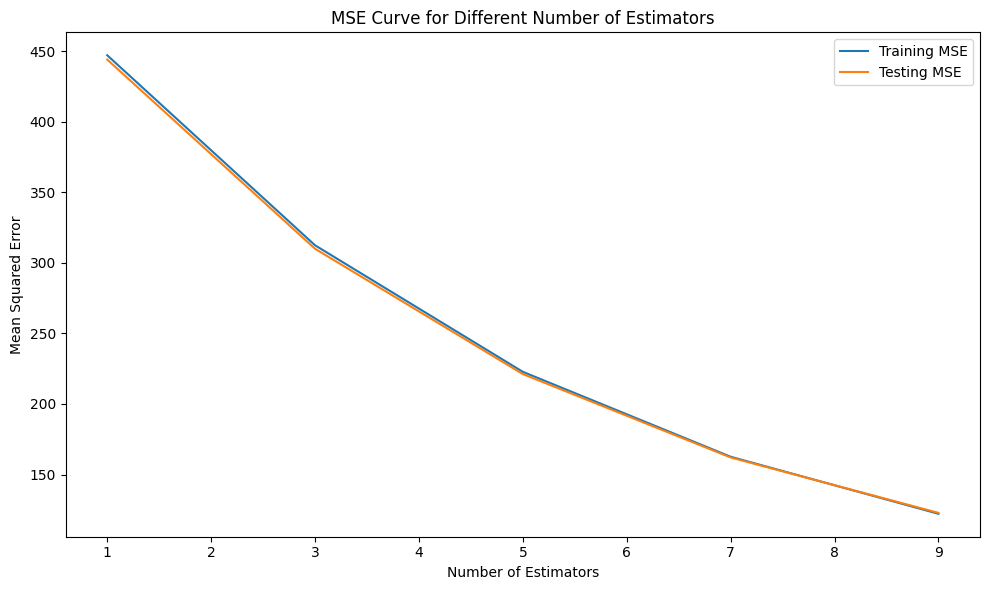

In [ ]:
from lightgbm import LGBMRegressor

num_estimators = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for n in num_estimators:
    # Train the LGBM regression model
    model = LGBMRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


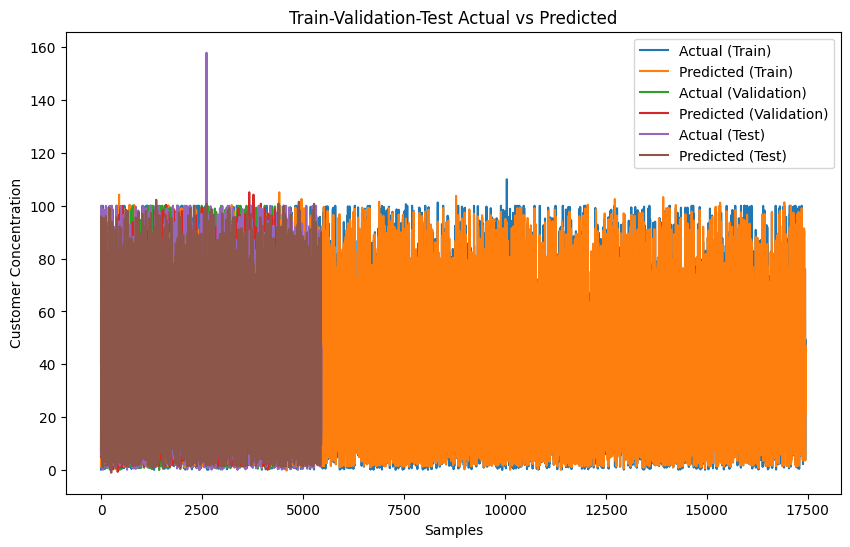

In [ ]:
# Calculate the training set predictions
y_pred_train = lgbm_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = lgbm_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = lgbm_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


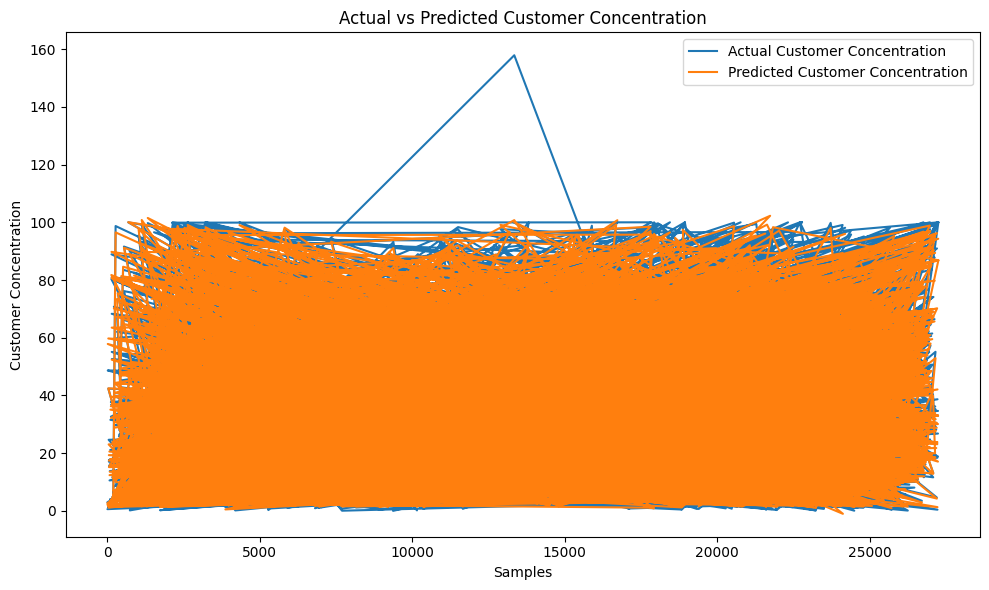

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lgbm_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


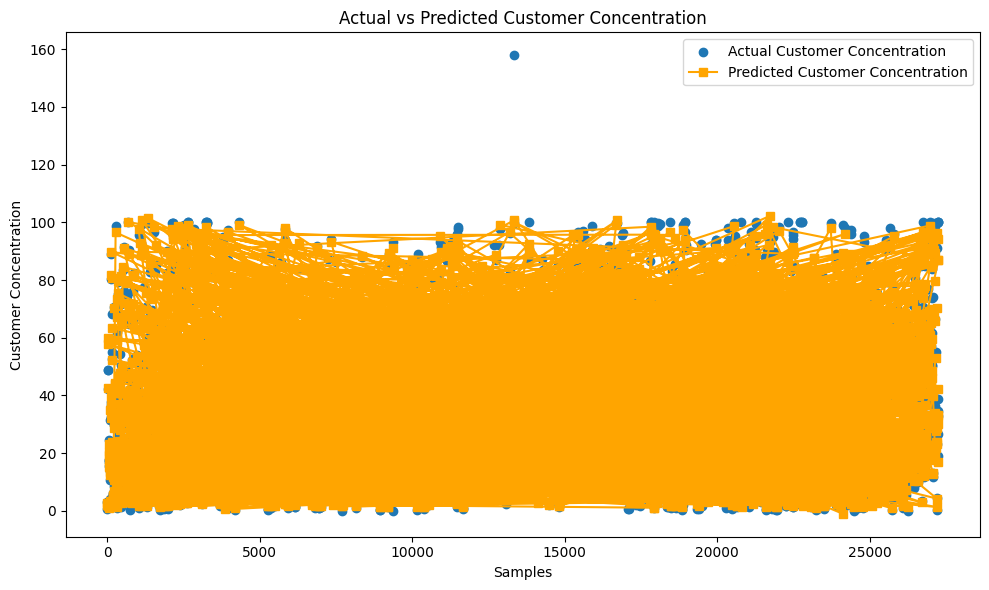

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lgbm_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate LGBMRegressor model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

mae = mean_absolute_error(y_test, lgbm_pred)
mse = mean_squared_error(y_test, lgbm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lgbm_pred)
rmsle = np.sqrt(np.mean(np.log1p(lgbm_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100

print("\nLGBMRegressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 5
[LightGBM] [Info] Start training from score 32.520210

LGBMRegressor Model:
Mean Absolute Error (MAE): 2.30
Mean Squared Error (MSE): 19.09
Root Mean Squared Error (RMSE): 4.37
R-squared (R2): 0.96
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 19.98%


<ipython-input-32-f2b9cf2c588a>:14: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(lgbm_pred) - np.log1p(y_test)) ** 2)


Cross-Validation RMSE Scores: [22.4181483  22.51866516 23.20806403 22.26633038 21.5098037 ]
Mean Cross-Validation RMSE: 22.384202313033363


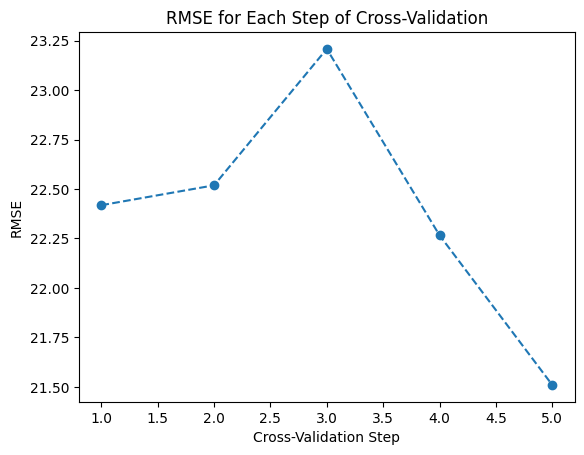

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(svr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [ ]:
# Assuming X_val and y_val are defined

# Predict on the validation set
y_pred_val = svr_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 512.4111838102145
Validation Mean Absolute Error: 16.616170065891993


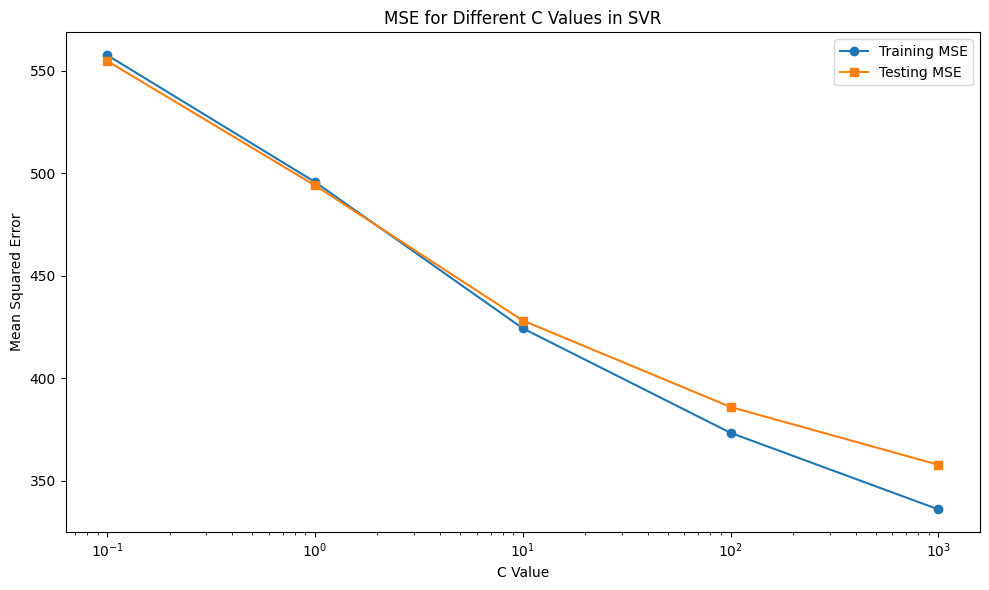

In [ ]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Instead of num_estimators, we'll use a range of C values for SVR
C_values = [0.1, 1, 10, 100, 1000]
train_errors = []
test_errors = []

for C in C_values:
    # Initialize and train the SVR model with the current C value
    model = SVR(C=C)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and append the mean squared errors for both sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training MSE', marker='o')
plt.plot(C_values, test_errors, label='Testing MSE', marker='s')
plt.title('MSE for Different C Values in SVR')
plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # C values span several orders of magnitude
plt.legend()
plt.tight_layout()
plt.show()


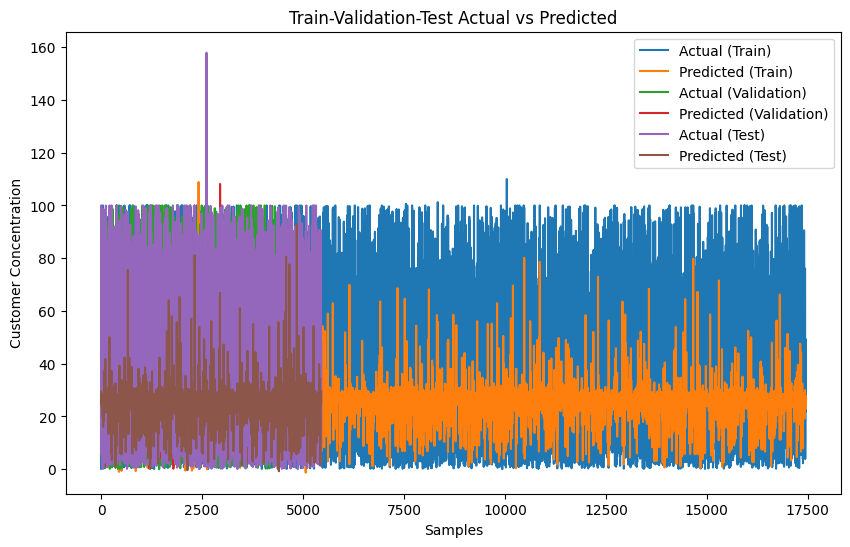

In [ ]:
# Calculate the training set predictions
y_pred_train = svr_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = svr_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = svr_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


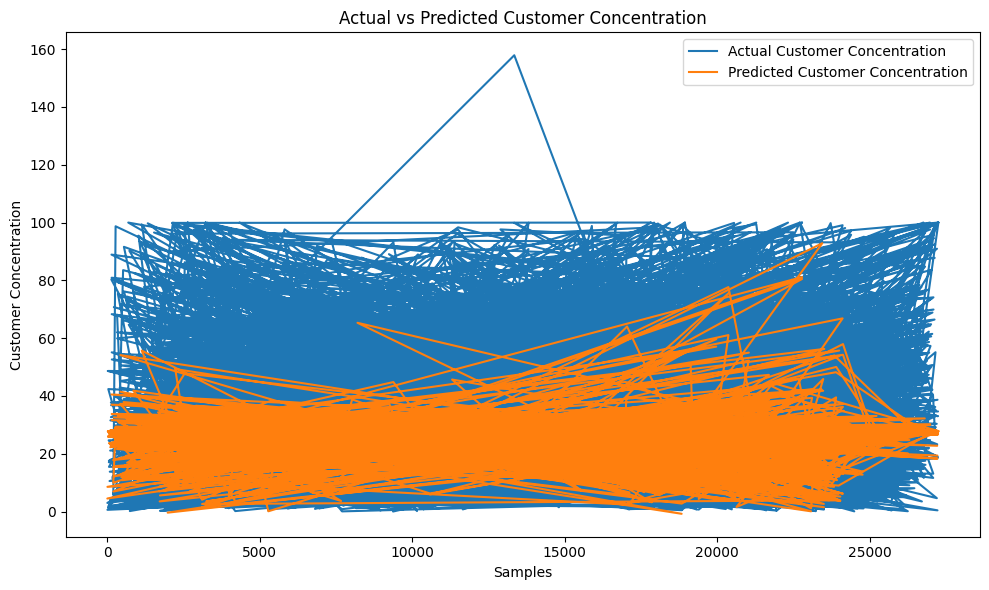

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


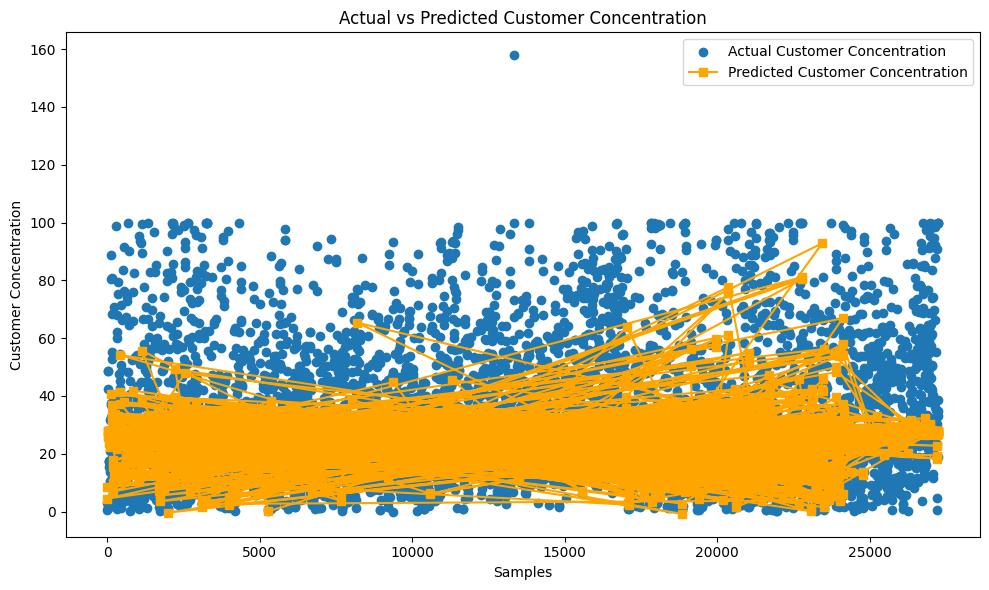

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels, like 'linear', 'poly', etc.
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)
rmsle = np.sqrt(np.mean(np.log1p(svr_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100

print("\nSVR Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



SVR Model:
Mean Absolute Error (MAE): 16.29
Mean Squared Error (MSE): 494.13
Root Mean Squared Error (RMSE): 22.23
R-squared (R2): 0.08
Root Mean Squared Logarithmic Error (RMSLE): 0.06
Mean Absolute Percentage Error (MAPE): 173.62%


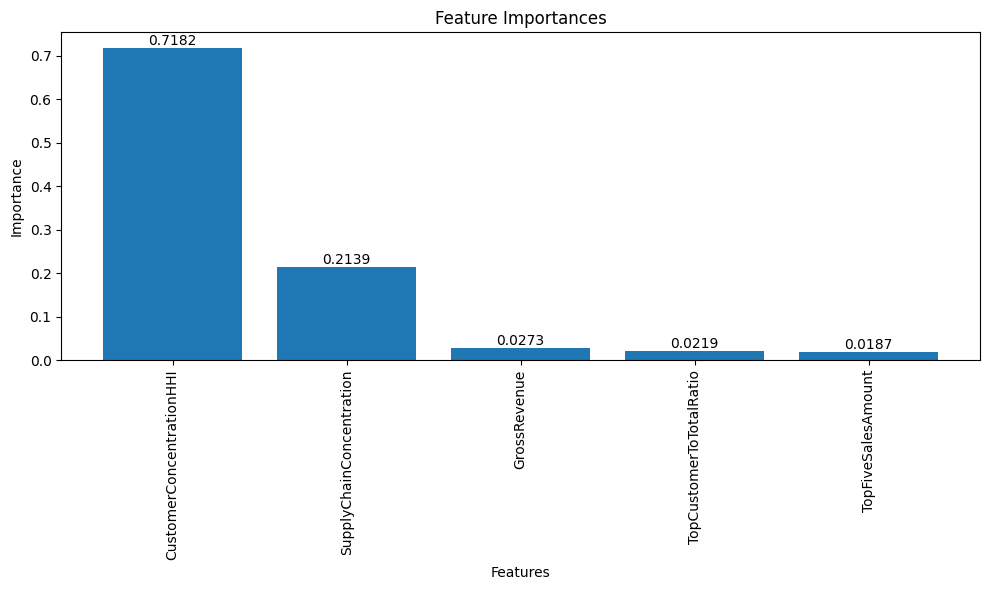

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the XGBRegressor model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Importance for selecting the desired features by column
selected_features = ['TopFiveSalesAmount', 'GrossRevenue', 'TopCustomerToTotalRatio', 'CustomerConcentrationHHI', 'SupplyChainConcentration']

# Extract feature importances for selected features
importances = model.feature_importances_
feature_names = X.columns

selected_importances = []
for feature in selected_features:
    if feature in feature_names:
        feature_index = np.where(feature_names == feature)[0][0]
        selected_importances.append(importances[feature_index])
    else:
        selected_importances.append(0)  # Assign 0 importance if feature not found

# Create a DataFrame with selected feature names and importance scores
selected_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})

# Sort the DataFrame by importance scores in descending order
selected_feature_importances = selected_feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances with values displayed inside the bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


Cross-Validation RMSE Scores: [3.70208314 3.51721421 3.75129171 3.90031418 3.914926  ]
Mean Cross-Validation RMSE: 3.757165848595587


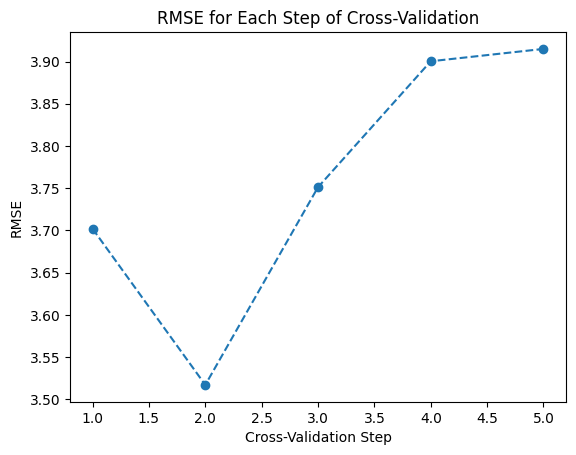

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Perform cross-validation with 5 folds using negative mean squared error as the scoring metric
cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE from negative MSE scores
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using the XGBRegressor
y_pred_test = xgb_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 16.01970439336326
Mean Absolute Error: 1.9006286598014173


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the validation set using the XGBRegressor
y_pred_val = xgb_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 14.534996205029188
Validation Mean Absolute Error: 1.9644692436267246


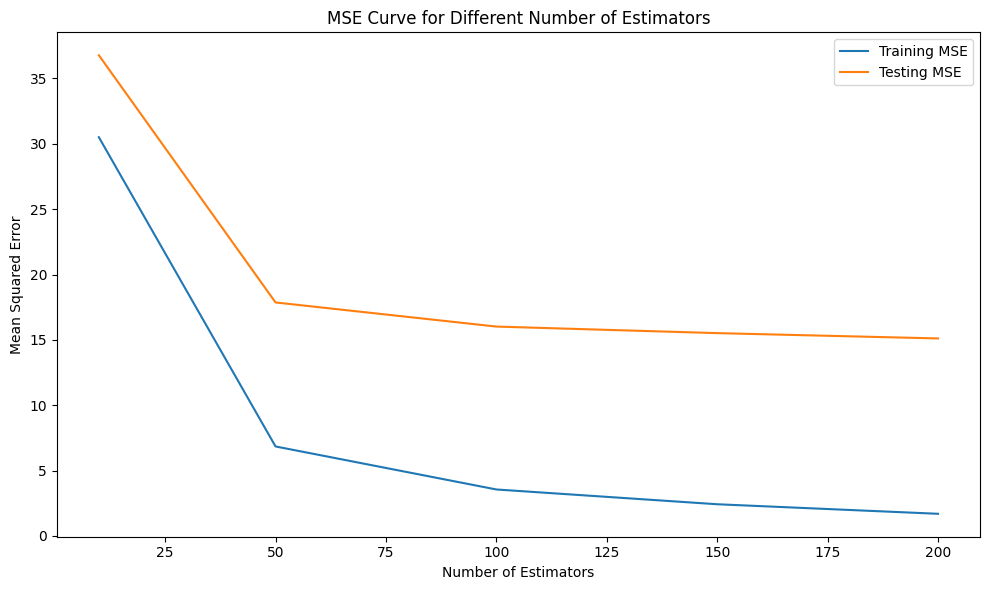

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []

for n in num_estimators:
    # Train the XGBRegressor model with different numbers of estimators
    model = xgb.XGBRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


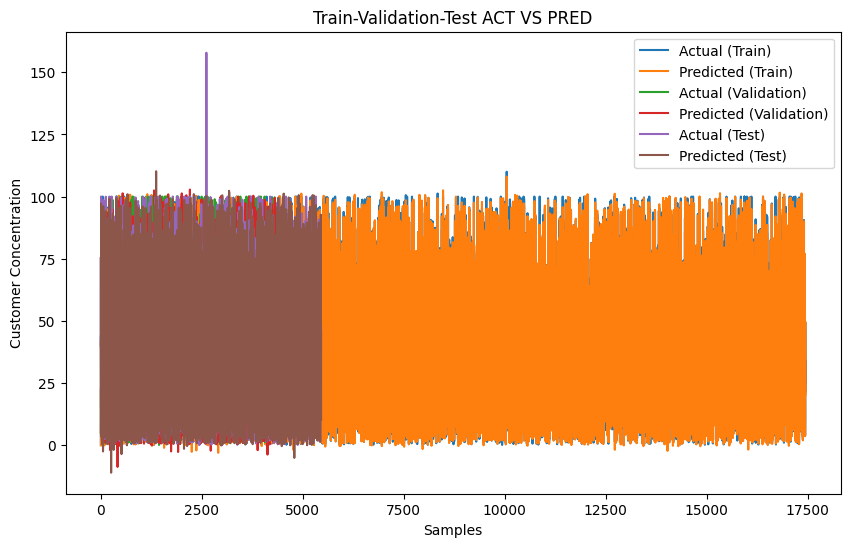

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Calculate the training set predictions
y_pred_train = xgb_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Predict on the validation and test sets
y_pred_val = xgb_regressor.predict(X_val)
y_pred_test = xgb_regressor.predict(X_test)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


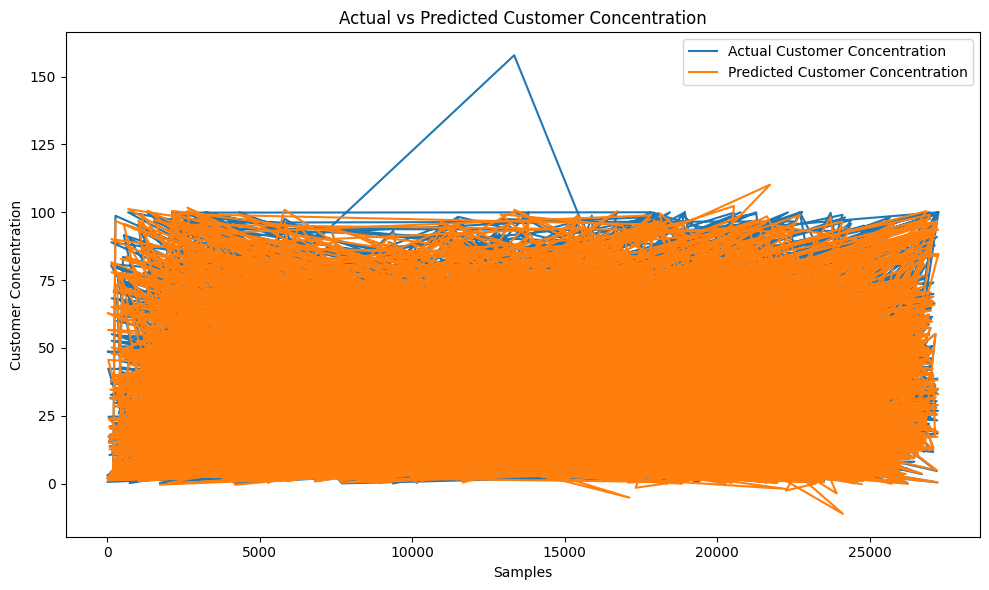

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Create a DataFrame with actual and predicted customer concentration values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted customer concentration values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


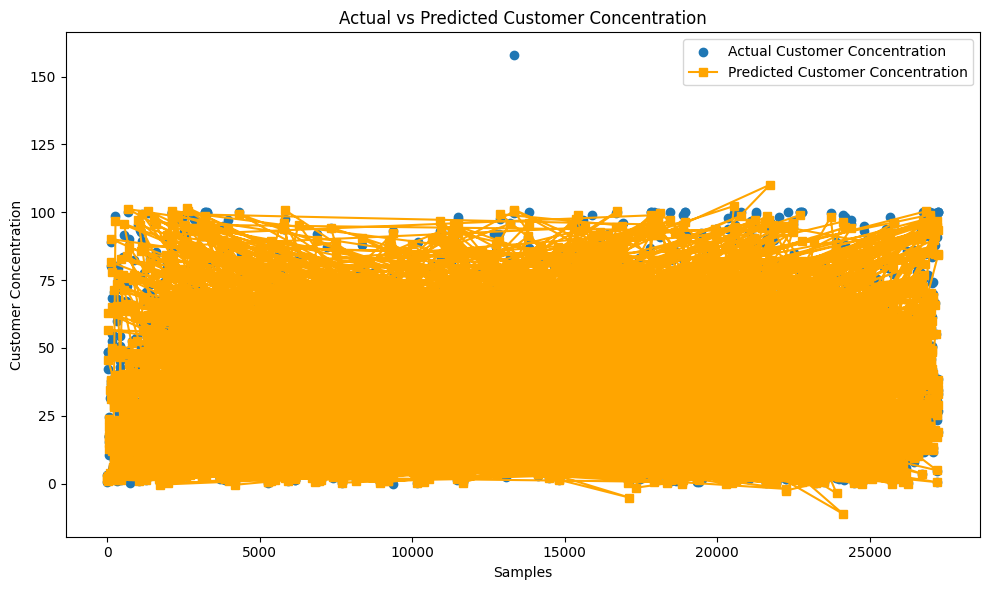

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Create a DataFrame with actual and predicted customer concentration values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted customer concentration values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate XGBRegressor with a specific number of estimators
xgb_model = xgb.XGBRegressor(n_estimators=num_estimators, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)
rmsle = np.sqrt(np.mean(np.log1p(xgb_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print(f"\nXGBRegressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



XGBRegressor Model with 100 Estimators:
Mean Absolute Error (MAE): 1.90
Mean Squared Error (MSE): 16.02
Root Mean Squared Error (RMSE): 4.00
R-squared (R2): 0.97
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 14.33%


<ipython-input-48-60587abcdf45>:17: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(xgb_pred) - np.log1p(y_test)) ** 2)
